# Student Name: Thomas Jones
# Student Number: 19335348

In [53]:
import astro_modelling_functions 

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.signal import correlate

# %run astro_modelling_functions.ipynb

In [55]:
#importing rv and transit data
transit = np.load('JSAstroLab2022_transit_data.npz')
rv = np.load('JSAstroLab2022_rv_data.npz')

In [56]:
#defining mass, radius and temperature of the star
M = 0.102
R = 0.137
Temp = 2800

G = 6.67408e-11  #gravitational constant

# Task 1 - Finding and plotting the radial velocity data


In [57]:
rv_h = rv.files       #defining handles for rv

spectra = rv_h[3::2]  #defining handles for spectra and times
times = rv_h[4::2]
wl = rv[rv_h[0]]      #extracting wavelength, velocity and spectral template from the rv file
v = rv[rv_h[1]]
spec_template = rv[rv_h[2]]

/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/192235827.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  ax1.plot(wl, rv[spectra[0]], 'r.', color = 'c', label = "Recorded Spectrum")


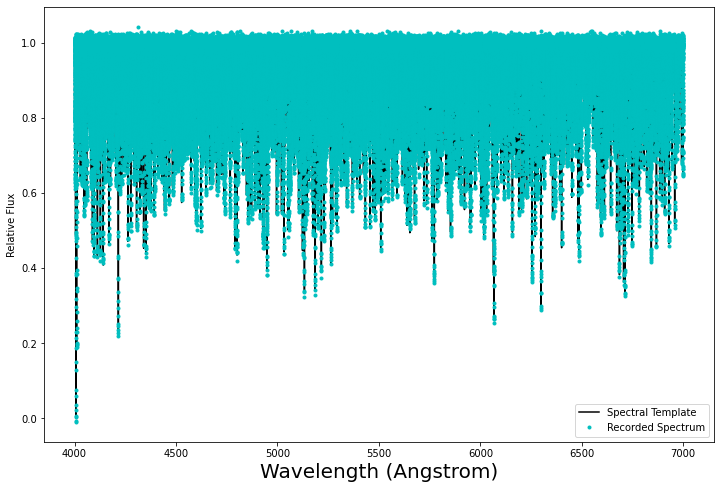

In [58]:
#test plot of one of the spectra against velocity superimposed on the spectral template
fig1, ax1 = plt.subplots(figsize = (12,8))
ax1.plot(wl, spec_template, 'k', label = "Spectral Template")
ax1.plot(wl, rv[spectra[0]], 'r.', color = 'c', label = "Recorded Spectrum")
#ax1.set_title("Spectrum")
ax1.set_xlabel("Wavelength (Angstrom)", fontsize = 20)
ax1.set_ylabel("Relative Flux")
ax1.legend()

In [59]:
#test plot for velocity shift of first spectrum with respect to the spectral template
spectrum = rv[spectra[0]]  #selecting the first spectrum in the dataset to plot

#correlation method with the spectrum and the spectral template
corr = correlate(spectrum - spectrum.mean(), spec_template - spec_template.mean(), mode = 'same') 

#fitting a gaussian function to the velocity shift using curve_fit
fit, var = curve_fit(gaussian, v, corr, p0 = [4000, 1000, 0, 1000])
mean, sigma, b, a = fit #defining the fitting parameters

print(f"Mean value of velocity for this measured spectrum is {mean:.3f} m/s and error in the mean is {np.sqrt(np.diag(var)[0]):.3f} m/s")

#plotting this cross correlation of the spectrum to the template with the fitted gaussian function
fig2, ax2 = plt.subplots(figsize = (12,8))
ax2.plot(v, corr, 'k.', label = "Data", markersize = 8)
ax2.plot(v, gaussian(v, mean, sigma, b, a), 'cyan', label = "Gaussian Fit to Data", linewidth = 2)
ax2.set_xlim(-0.2e6, 0.2e6)
ax2.set_xlabel("Velocity Shift", fontsize = 15)
ax2.legend()

NameError: name 'np' is not defined

In [43]:
shift = np.zeros(len(spectra)) #empty list in which velocity shifts will be stored

time_list = np.zeros(len(times)) #empty list in which times will be stored

#loop over all spectra to find shift of every spectrum w.r.t the spectral template and store times in an array
for j in range(len(spectra)):   
    v_shift = cross_func(rv[spectra[j]], spec_template)
    shift[j] = v_shift 
    time_list[j] = float(rv[times[j]]) #converting each size 1 numpy array into a float   
    
    
rv_starting_time = time_list.min()  #timestamp of first recorded spectrum in the rv data

time_list -= time_list.min() #bringing times back to zero for simplicity

NameError: name 'correlate' is not defined

Text(0, 0.5, 'Radial Velocity $(ms^{-1})$')

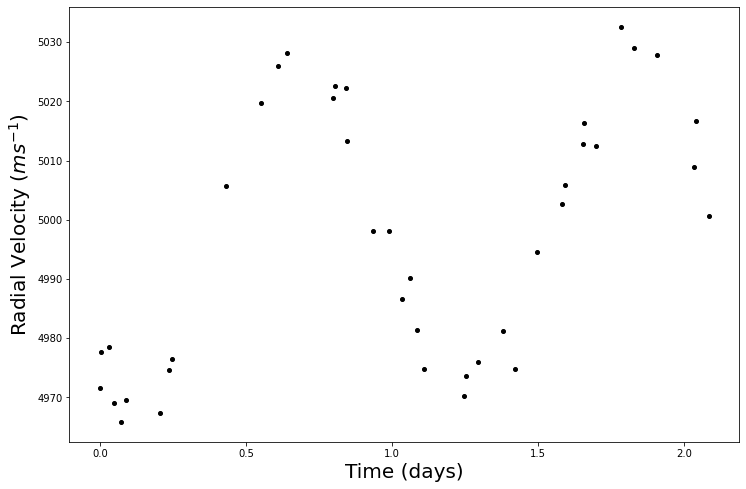

In [20]:
#time array for which to plot the sinusoidal fit over
t = np.linspace(0.0,2.15,100)

#plotting the individual radial velocities against their respective timestamps
fig3, ax3 = plt.subplots(figsize = (12,8))
ax3.plot(time_list, shift, 'k.', markersize = 8)
ax3.set_xlabel("Time (days)", fontsize = 20)
ax3.set_ylabel(r"Radial Velocity $(ms^{-1})$", fontsize = 20)

# Task 2 - Fitting the transit data with the transit model

Difference between the starting time of the transit and rv data is 0.832 days


Text(0, 0.5, 'Relative Flux')

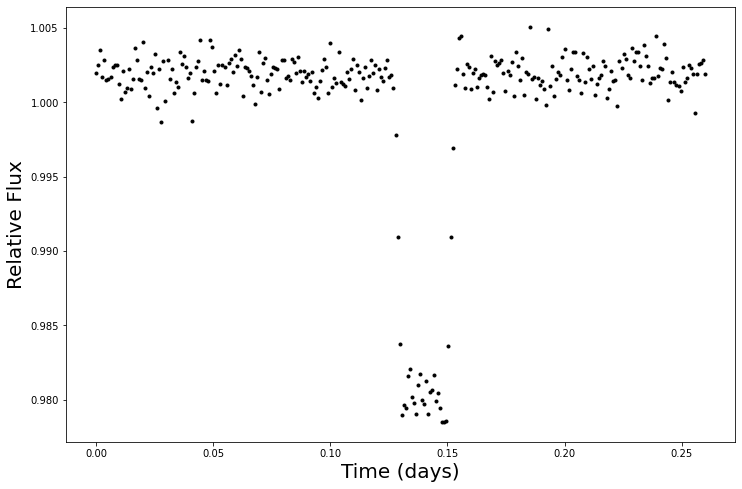

In [21]:
# stores timestamps and respective flux in arrays and period in a variable P
t_tran, fl, P = transit['time'], transit['flux'], transit['P'] 

#defining the difference between the starting times of the transit and rv data
diff_in_time = t_tran.min() - rv_starting_time   
print(f"Difference between the starting time of the transit and rv data is {diff_in_time:.3f} days")

t_tran -= t_tran.min()  #bringing times back to start at zero for simplicity 

#plotting the recorded flux as a function of time
fig4, ax4 = plt.subplots(figsize = (12,8))
ax4.plot(t_tran, fl, 'k.')
ax4.set_xlabel("Time (days)", fontsize = 20)
ax4.set_ylabel("Relative Flux", fontsize = 20)

In [22]:
# #fitting the transit data using the transit model
# fit3, var3 = curve_fit(transit_flux, t_tran, fl, p0 = [0.14, 15, 0.1, np.pi/2+0.001, 1] )  #fitting the transit function
# T_0, a, p, i, f_oot = fit3  #transit parameters
# fit3_errors = np.sqrt(np.diag(var3))  #errors in the transit parameters

# print(f"Fitted transit parameters T_0, a, p, i, f_oot are {fit3} with errors {fit3_errors}")

# flux_output = np.ones(len(t_tran))

# for j in range(len(t_tran)):
#     flux_output[j] = 
    

# #plotting the fit to the transit model with the recorded transit data
# fig5, ax5 = plt.subplots(figsize = (12,8))
# ax5.plot(t_tran, fl, 'k.', label = "Transit Data")
# ax5.plot(t_tran, transit_flux(t_tran, T_0, a, p, i, f_oot), 'cyan', linewidth = 2, label = "Fit to Transit Data")
# ax5.set_xlabel("Time (days)", fontsize = 20)
# ax5.set_ylabel("Relative Flux", fontsize = 20)
# ax5.legend()

/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/3939583968.py:23: RuntimeWarning: invalid value encountered in arccos
  k_0 = np.arccos((p**2 + z**2 - 1)/(2 * p * z))  #computing k0 and k1 values for each z
/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/3939583968.py:24: RuntimeWarning: invalid value encountered in arccos
  k_1 = np.arccos((1 - p**2 + z**2)/(2 * z))


Fitted transit parameters T_0, a, p, i, f_oot are [ 0.14001942 15.64129814  0.14784566  1.58332651  1.00196731] with errors [5.65715200e-05 5.97739049e-01 7.51915638e-04 1.24384852e-02
 6.25694787e-05]


/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/3939583968.py:23: RuntimeWarning: invalid value encountered in arccos
  k_0 = np.arccos((p**2 + z**2 - 1)/(2 * p * z))  #computing k0 and k1 values for each z
/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/3939583968.py:24: RuntimeWarning: invalid value encountered in arccos
  k_1 = np.arccos((1 - p**2 + z**2)/(2 * z))


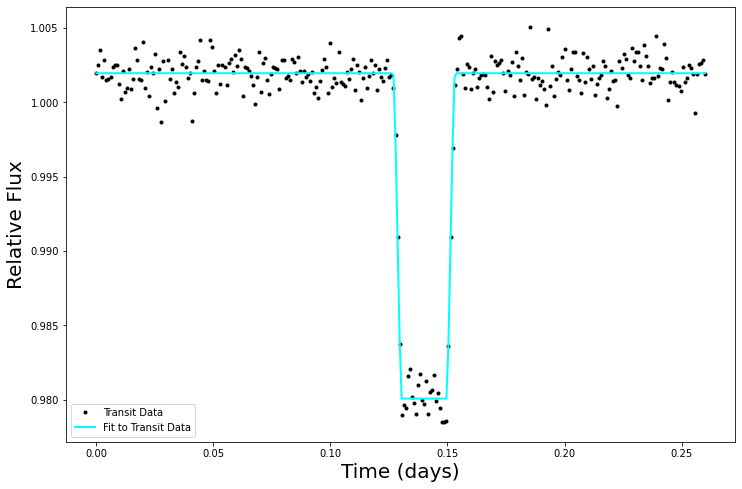

In [23]:
#fitting the transit data using the transit model
fit3, var3 = curve_fit(transit_flux, t_tran, fl, p0 = [0.14, 15, 0.1, np.pi/2+0.001, 1] )  #fitting the transit function
T_0, a, p, i, f_oot = fit3  #transit parameters
fit3_errors = np.sqrt(np.diag(var3))  #errors in the transit parameters

print(f"Fitted transit parameters T_0, a, p, i, f_oot are {fit3} with errors {fit3_errors}")


#plotting the fit to the transit model with the recorded transit data
fig5, ax5 = plt.subplots(figsize = (12,8))
ax5.plot(t_tran, fl, 'k.', label = "Transit Data")
ax5.plot(t_tran, transit_flux(t_tran, T_0, a, p, i, f_oot), 'cyan', linewidth = 2, label = "Fit to Transit Data")
ax5.set_xlabel("Time (days)", fontsize = 20)
ax5.set_ylabel("Relative Flux", fontsize = 20)
ax5.legend()

In [24]:
#extracting the error in the parameters for the  from the fit
dT_0 = fit3_errors[0]
da = fit3_errors[1]
dp = fit3_errors[2]
di = fit3_errors[3]
dsini = abs(np.cos(i) * di)   #error in sin(i) using gauss' error law
df_oot =fit3_errors[4]

In [25]:
r = R * p   #finding the radius of the planet in solar radii
dr = R * dp  #error in radius of the planet in solar radii
Earth_Sun_radius = 109.076  #ratio of sun radius to earth radius

r_p = r * Earth_Sun_radius  #writing the radius of the planet in earth radii
dr_p = dr * Earth_Sun_radius #error in the radius of the planet in earth radii
print(f"Radius of expoplanet = {r_p:.2f} +- {dr_p:.2f} Earth Radii")

r_earth_m = 6.371e+6 #earth radius in meters
r_m = r_p * r_earth_m  #writing the radius of the planet in metres
dr_m = dr_p * r_earth_m #error in radius of the planet in metres

Radius of expoplanet = 2.21 +- 0.01 Earth Radii


# Task 3 - Fitting the RV curve and finding the mass of the exoplanet
        


In [26]:
folded_times = np.zeros(len(time_list))

folded_times = np.where(time_list < P, time_list, time_list - P)    #folding times to cover just one period

Amplitude of fit is -29.144 and error in amplitude is [0.84438562 0.61249396] 


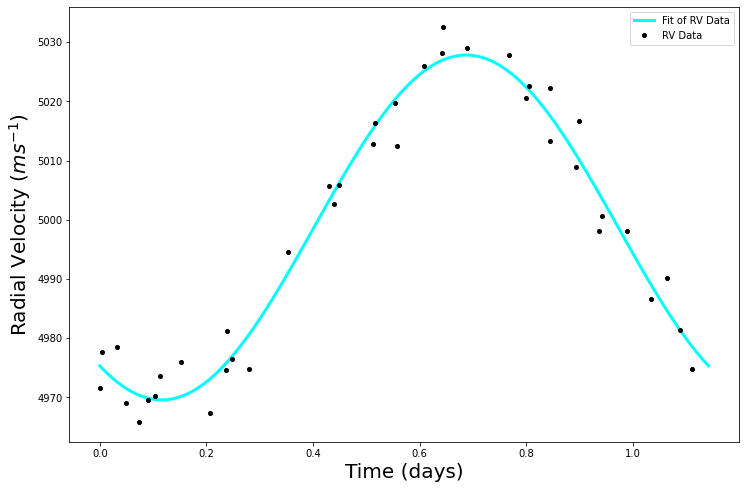

In [27]:
#fitting a sine function to the rv curve using
fit4, var4 = curve_fit(sin_fit, folded_times, shift, p0 = [-30, 5000])   
K, d = fit4  #rv curve fit parameters

print(f"Amplitude of fit is {fit4[0]:.3f} and error in amplitude is {np.sqrt(np.diag(var4))} ")

t = np.linspace(0, P, 100) #array for which to plot the rv fit against

#plotting the fit of the rv curve with the rv data
fig6, ax6 = plt.subplots(figsize = (12,8))
ax6.plot(t, sin_fit(t, K, d), color = 'cyan', linewidth = 3, label = "Fit of RV Data")
ax6.plot(folded_times, shift, 'k.', markersize = 8, label = "RV Data")
ax6.set_xlabel("Time (days)", fontsize = 20)
ax6.set_ylabel(r"Radial Velocity $(ms^{-1})$", fontsize = 20)
ax6.legend()

3.7613871412213933


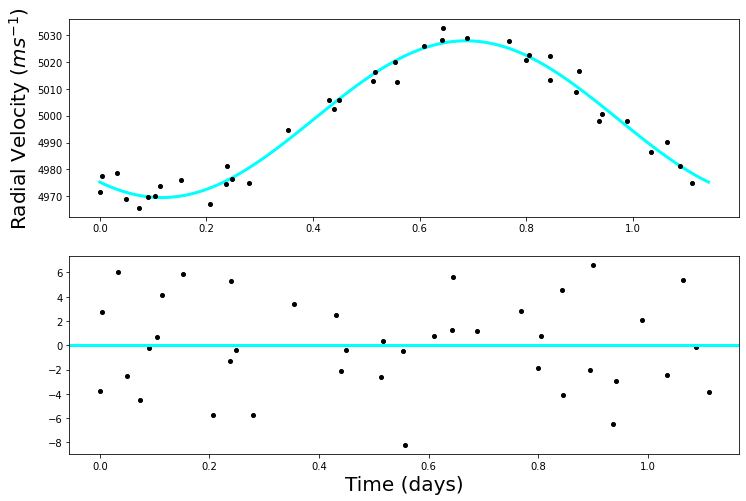

In [28]:
resid = residuals(shift, sin_fit, folded_times, K, d) #finding the residuals of the data w.r.t the best fit


#plotting the rv curve and residuals as functions of time
fig7, (ax, ax1) = plt.subplots(nrows = 2, figsize = (12,8))
ax.plot(t, sin_fit(t, K, d), color = 'cyan', linewidth = 3, label = "Fit of RV Data")
ax.plot(folded_times, shift, 'k.', markersize = 8, label = "RV Data")
ax.set_ylabel(r"Radial Velocity $(ms^{-1})$", fontsize = 20)
ax1.plot(folded_times, resid, 'k.', markersize = 8)
ax1.axhline(0, 0, 1.2, color = 'cyan', linewidth =3)
ax1.set_xlabel("Time (days)", fontsize = 20)

RMS = np.std(resid) #taking the standard deviation of the residuals to be the common error of the data
print(RMS)

RV fitting parameters are K, d = -29.14364330489521 , 4998.683623842412 with errors [0.82300525 0.59698528]


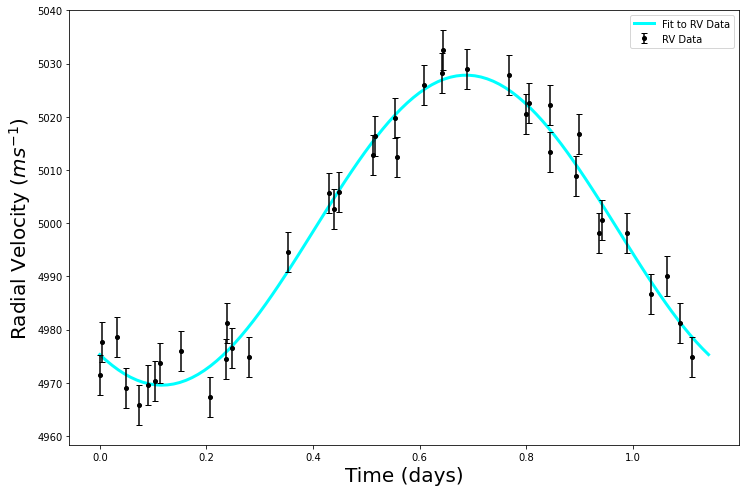

In [29]:
#fitting for rv data taking into account the error in the data
fit5, var5 = curve_fit(sin_fit, folded_times, shift, p0 = [-28, 5000], sigma = np.ones(len(shift))*RMS, absolute_sigma = True)
K, d = fit5  #new fitting parameters for rv curve 

print("RV fitting parameters are", "K, d =",K,",",d, "with errors", np.sqrt(np.diag(var5)))

dK = np.sqrt(np.diag(var5)[0])  #error in the amplitude of the rv curve fit


#plotting rv curve and best fit including the errors in the data
fig8, ax = plt.subplots(figsize = (12,8))
ax.plot(t, sin_fit(t, K, d), color = 'cyan', linewidth = 3, label = "Fit to RV Data")
ax.errorbar(folded_times, shift, fmt = 'k.', yerr = RMS*np.ones(len(shift)), capsize = 3, markersize = 8 , label = "RV Data")
ax.set_xlabel("Time (days)", fontsize = 20)
ax.set_ylabel(r"Radial Velocity $(ms^{-1})$", fontsize = 20)
ax.legend()

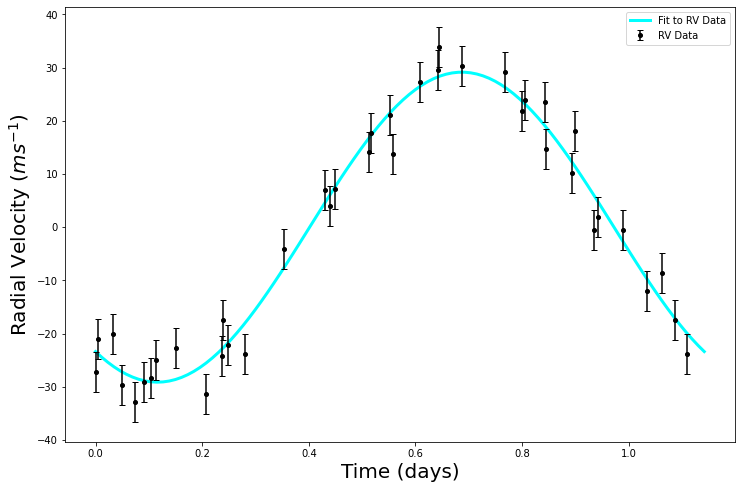

In [30]:
shift_nosystemic = shift - d  #taking away systemic velocity to see the true values of velocity shift

#plotting the fit of the rv curve with the systemic velocity subtracted
fig9, ax8 = plt.subplots(figsize = (12,8))
ax8.plot(t, sin_fit(t, K, 0), color = 'cyan', linewidth =3 , label = "Fit to RV Data")
ax8.errorbar(folded_times, shift_nosystemic, yerr = RMS, fmt = 'k.', capsize = 3, markersize = 8, label = "RV Data")
ax8.set_xlabel("Time (days)", fontsize = 20)
ax8.set_ylabel(r"Radial Velocity $(ms^{-1})$", fontsize = 20)
ax8.legend()

In [31]:
#calculating the mass of the planet
K_abs = abs(K)  #taking absolute value of amplitude 

Msun_kg = 1.99e30 #mass of sun in kg
M_kg = M *  Msun_kg #mass of this star in kg

m_kg = ((((M_kg**(2/3)) * K_abs)/np.sin(i)) * ((P*24*60*60)/(2 * np.pi *G))**(1/3))  #mass of the planet in kg
dm_kg = gauss_error(m_kg ,np.sin(i),  dsini, K_abs, dK) #error in planet mass in kg from gauss' error law

M_earth = 5.972e24  #mass of earth in kg
m = m_kg/M_earth #mass of planet in earth masses
dm = gauss_error(m ,np.sin(i),  dsini, K_abs, dK)  #error in planet mass in earth masses

min_m = m*np.sin(i)
dmin_m = gauss_error(min_m, m, dm, np.sin(i), dsini)

print(f"Mass of exoplanet = {m:.5f} +- {dm:.5f} Earth Masses")
print(f"Minimum mass of exoplanet = {min_m:.5f} +- {dmin_m:.5f} Earth Masses")

Mass of exoplanet = 10.40558 +- 0.29385 Earth Masses
Minimum mass of exoplanet = 10.40476 +- 0.29384 Earth Masses


# Task 4 - Finding density, semimajor axis and other system characteristics

In [32]:
#finding the semimajor axis of the system
au = 149597871000 #1au in metres
solar_au = 0.0046524726 #solar radius in au
R_star_au = solar_au * R  #radius of this star in au
semi_major = R_star_au * a  #semi major axis of this system in au
dsemi_major = R_star_au * da  #error in semi major axis in au
print(f"Semi major axis of planet-star system ={semi_major:.4f} +- {dsemi_major:.4f}au")

Semi major axis of planet-star system =0.0100 +- 0.0004au


In [33]:
#calculating the density of the planet

vol_p = (4/3 * np.pi * (r_m)**3)  #volume of the planet in m^3
dvol_p = (vol_p * 3 * 4/3 * np.pi * dr_m)/r_m #error in planet volume in m^3

density = m_kg/vol_p  #density of planet in kg/m^3
d_density = gauss_error(density, vol_p, dvol_p, m_kg, dm_kg) #error in density of planet in kg/m^3

earth_density = 5520 #in kg

dens_p = density/earth_density #density of the planet in earth densities
ddens_p = d_density/earth_density # error in density of planet in earth densities


print(f"Density of exoplanet = {density:.2f} +- {d_density:.2f} kg/m^3")
print(f"Density of exoplanet = {dens_p:.2f} +- {ddens_p:.2f} earth densities")

Density of exoplanet = 5319.85 +- 371.71 kg/m^3
Density of exoplanet = 0.96 +- 0.07 earth densities


In [34]:
#Calculating the flux at the surface of the exoplanet
R_star_m = R_star_au * au #radius of the star in m
stefboltz = 5.6704e-8 #stefan boltzmann constant
surface_flux = stefboltz * Temp**4 #surface flux of the star
luminosity = surface_flux * 4*np.pi*(R_star_m)**2 #luminosity of the star in W
semi_major_m = semi_major*au #semi major axis in m
surface_flux = luminosity/(4*np.pi*semi_major_m**2) #flux at surface of exoplanet in W/m^2
flux_at_earth = 1361 #flux at earths surface


print(surface_flux, "W/m^2")
print(surface_flux/flux_at_earth)

14246.239232160035 W/m^2
10.467479230095543


/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/3939583968.py:23: RuntimeWarning: invalid value encountered in arccos
  k_0 = np.arccos((p**2 + z**2 - 1)/(2 * p * z))  #computing k0 and k1 values for each z
/var/folders/zj/v2ngtqyn5sz9qs120rl_8_2c0000gn/T/ipykernel_25176/3939583968.py:24: RuntimeWarning: invalid value encountered in arccos
  k_1 = np.arccos((1 - p**2 + z**2)/(2 * z))


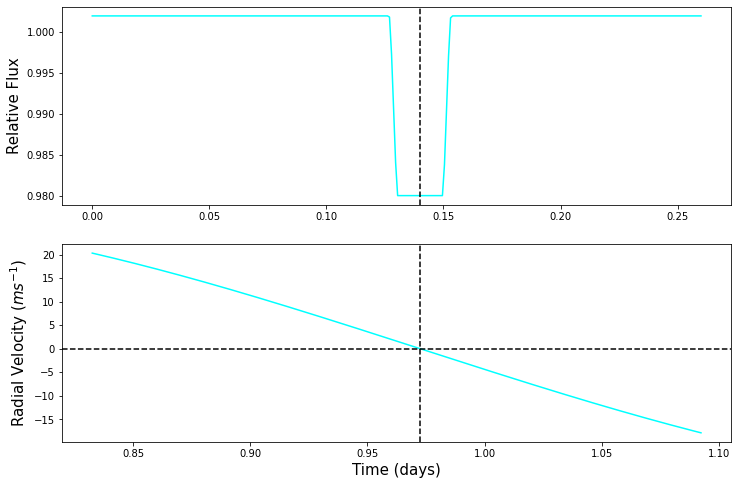

In [35]:
t1 = t_tran + diff_in_time  #starting time of transit data w.r.t rv data


#plotting transit curve and the part of the rv curve that corresponds to the same time period
fig10, (ax9, ax10) = plt.subplots(nrows = 2, figsize = (12, 8))
ax9.plot(t_tran, transit_flux(t_tran, T_0, a, p, i, f_oot), 'cyan')
ax9.axvline(x = T_0, color = 'k', linestyle = '--')
ax9.set_ylabel("Relative Flux", fontsize = 15)
ax10.plot(t1, sin_fit(t1, K, 0), color = 'cyan')
ax10.axvline(x = T_0 + diff_in_time, color = 'k', linestyle = '--')
ax10.axhline(0, 0, 1.1, color = 'k', linestyle = '--')
ax10.set_ylabel(r"Radial Velocity $(ms^{-1})$", fontsize = 15)
ax10.set_xlabel("Time (days)", fontsize = 15)
fig9.subplots_adjust(hspace = 0)

In [36]:
"""#saving figures 
fig1.savefig("test_spectrum.jpg")
fig2.savefig("v_correlate.jpg")
fig3.savefig("rv_data.jpg")
fig4.savefig("transit_data.jpg")
fig5.savefig("transit_fit.jpg")
fig6.savefig("rv_fit.jpg")
fig7.savefig("residuals.jpg")
fig8.savefig("rvfit_errors.jpg")
fig9.savefig("rvfit_nosystemic.jpg")
fig10.savefig("rv_vs_transit.jpg")"""

'#saving figures \nfig1.savefig("test_spectrum.jpg")\nfig2.savefig("v_correlate.jpg")\nfig3.savefig("rv_data.jpg")\nfig4.savefig("transit_data.jpg")\nfig5.savefig("transit_fit.jpg")\nfig6.savefig("rv_fit.jpg")\nfig7.savefig("residuals.jpg")\nfig8.savefig("rvfit_errors.jpg")\nfig9.savefig("rvfit_nosystemic.jpg")\nfig10.savefig("rv_vs_transit.jpg")'